
Bit flip/repeation code with error
----------------------
{'0': 1024}


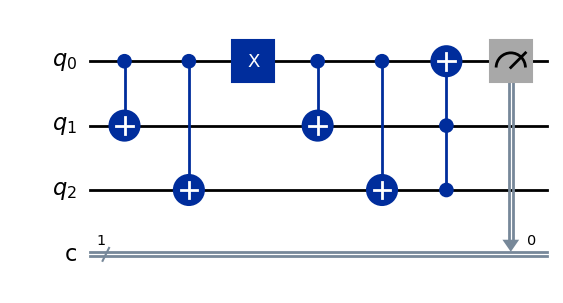

In [ ]:
from qiskit import QuantumRegister
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit
# from qiskit.tools.monitor import job_monitor
from qiskit_aer import AerSimulator
from qiskit import transpile

print('\nBit Flip Code')
print('----------------')

# IBMQ.enable_account('ENTER API KEY HERE')
# provider = IBMQ.get_provider(hub='ibm-q')

# backend = provider.get_backend('ibmq_qasm_simulator')

q = QuantumRegister(3,'q')
c = ClassicalRegister(1,'c')

circuit = QuantumCircuit(q,c)

circuit.cx(q[0],q[1])
circuit.cx(q[0],q[2])
circuit.x(q[0]) #Add this to simulate a bit flip error
circuit.cx(q[0],q[1])
circuit.cx(q[0],q[2])
circuit.ccx(q[2],q[1],q[0])
circuit.measure(q[0],c[0])

# job = execute(circuit, backend, shots=1000)

def simulate_error_correction(circuit, shots=1024):
    """
    Simulate the quantum circuit using Qiskit's AerSimulator
    """
    simulator = AerSimulator()
    compiled_circuit = transpile(circuit, simulator)
    sim_result = simulator.run(compiled_circuit).result()
    counts = sim_result.get_counts()
    return counts

counts = simulate_error_correction(circuit)

# job_monitor(job)

# counts = job.result().get_counts()

print("\nBit flip code with error")
print("----------------------")
print(counts)

Shor Code
Uncorrected bit flip and phase error
{'1': 1024}

Shor code with bit flip and phase error
----------------------------------------
{'0': 1024}


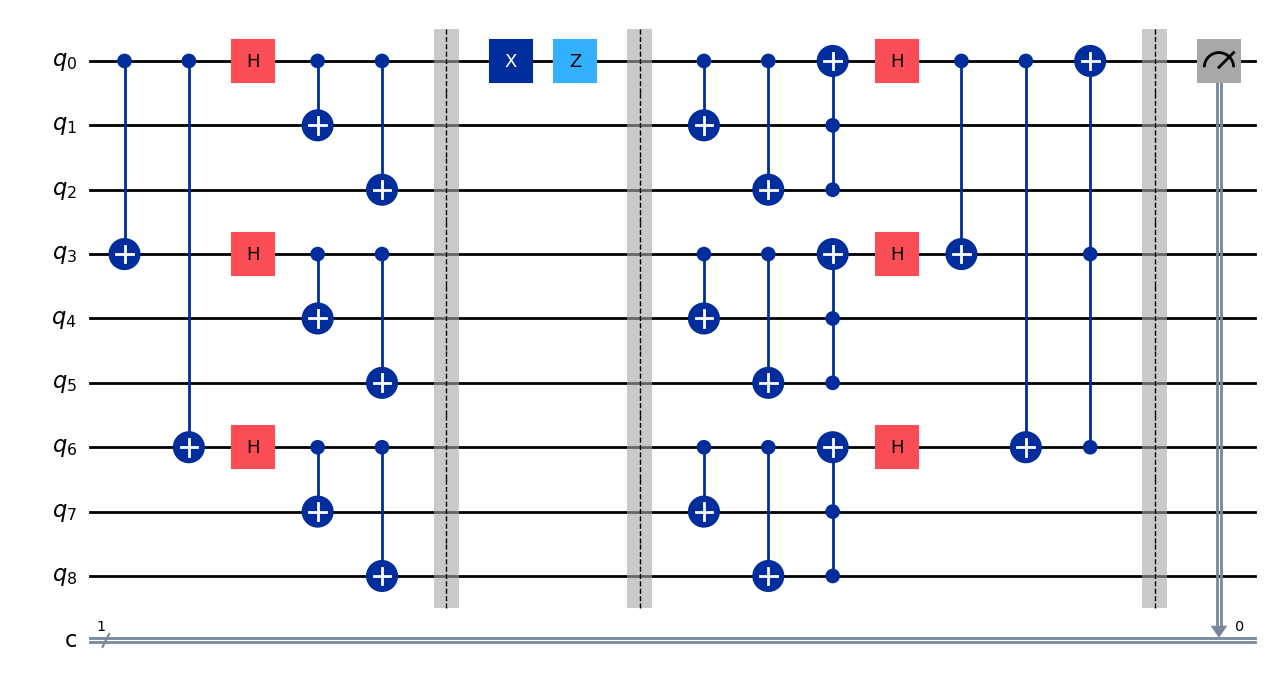

In [11]:
print('Shor Code')

from qiskit import QuantumRegister
from qiskit import ClassicalRegister
from qiskit import QuantumCircuit

q = QuantumRegister(1,'q')
c = ClassicalRegister(1,'c')

circuit = QuantumCircuit(q,c)

circuit.h(q[0])

circuit.x(q[0])#Bit flip error
circuit.z(q[0])#Phase flip error

circuit.h(q[0])

circuit.barrier(q)

circuit.measure(q[0],c[0])



counts = simulate_error_correction(circuit)


print("Uncorrected bit flip and phase error")
print(counts)
# circuit_image = circuit.draw(output='mpl')
# display(circuit_image)

#####Shor code starts here ########
q = QuantumRegister(9,'q')
c = ClassicalRegister(1,'c')

circuit = QuantumCircuit(q,c)

circuit.cx(q[0],q[3])
circuit.cx(q[0],q[6])

circuit.h(q[0])
circuit.h(q[3])
circuit.h(q[6])

circuit.cx(q[0],q[1])
circuit.cx(q[3],q[4])
circuit.cx(q[6],q[7])

circuit.cx(q[0],q[2])
circuit.cx(q[3],q[5])
circuit.cx(q[6],q[8])

circuit.barrier(q)

####error here############
circuit.x(q[0])#Bit flip error
circuit.z(q[0])#Phase flip error
############################

circuit.barrier(q)
circuit.cx(q[0],q[1])
circuit.cx(q[3],q[4])
circuit.cx(q[6],q[7])

circuit.cx(q[0],q[2])
circuit.cx(q[3],q[5])
circuit.cx(q[6],q[8])

circuit.ccx(q[1],q[2],q[0])
circuit.ccx(q[4],q[5],q[3])
circuit.ccx(q[8],q[7],q[6])

circuit.h(q[0])
circuit.h(q[3])
circuit.h(q[6])

circuit.cx(q[0],q[3])
circuit.cx(q[0],q[6])
circuit.ccx(q[6],q[3],q[0])

circuit.barrier(q)

circuit.measure(q[0],c[0])

circuit.draw(output='mpl',filename='shorcode.png') #Draws an image of the circuit



counts = simulate_error_correction(circuit)

print("\nShor code with bit flip and phase error")
print("----------------------------------------")
print(counts)
circuit_image = circuit.draw(output='mpl')
display(circuit_image)